📌 GROUP: SISCCO-2301
TEAM MEMBERS:
Mushrapilov Rishat, Aikimbayev Maxat, Baigulov Alizhan

This project analyzes a photo archive using YOLO for object detection and DeepFace for face analysis. YOLO identifies and classifies objects in each image, while DeepFace detects faces and extracts attributes such as age, gender, and emotion. The collected data is then visualized with charts to show the most common objects, facial characteristics, and overall patterns in the dataset. The project provides a fast and automated way to turn a large collection of images into clear, structured insights.




In [ ]:
!pip -q install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00


🔍 Method 1: Object Detection with YOLO (YOLOv8)

In [ ]:
import os
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # You can switch to "yolov8s.pt" for higher accuracy

# Path to the folder with photos
photo_dir = "/content/drive/MyDrive/photos_colab/"  # Replace with your own path

# Get a list of all image files in the folder
image_files = [
    f for f in os.listdir(photo_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
]

# Loop through and analyze each image
for image_name in image_files:
    image_path = os.path.join(photo_dir, image_name)
    results = model(image_path)  # YOLO analyzes the image

    detected_objects = []
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            detected_objects.append(model.names[cls])  # Get detected class name

    print(f"📸 Photo: {image_name}")
    print("🧐 Detected objects:", detected_objects)
    print("-" * 50)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/photos_colab/hijab-3064633_1280.jpg: 448x640 1 person, 511.1ms
Speed: 18.0ms preprocess, 511.1ms inference, 46.6ms postprocess per image at shape (1, 3, 448, 640)
📸 Photo: hijab-3064633_1280.jpg
🧐 Detected objects: ['person']
--------------------------------------------------

image 1/1 /content/drive/MyDrive/photos_colab/girl-5819711_1280.jpg: 448x640 1 person, 176.8ms
Speed: 2.6ms preprocess, 176.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
📸 Photo: girl-5819711_1280.jpg
🧐 Detected objects: ['person']
--------------------------------------------------

image 1/1 /content/drive/MyDrive/photos_colab/kids-2408614_1280.jpg: 4

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


🔍 Method 2: Face Analysis with DeepFace

📌 Code for Processing Images with DeepFace

In [ ]:
!pip -q install deepface


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
import os
from deepface import DeepFace

# Path to the folder with photos
photo_dir = "/content/drive/MyDrive/photos_colab/"  # Replace with your own path

# Get a list of all image files in the folder
image_files = [
    f for f in os.listdir(photo_dir)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
]

# Loop through and analyze each image
for image_name in image_files:
    image_path = os.path.join(photo_dir, image_name)

    try:
        # Analyze faces in the photo
        results = DeepFace.analyze(
            image_path,
            actions=["age", "gender", "emotion"],
            enforce_detection=False
        )

        print(f"📸 Photo: {image_name}")

        for i, face in enumerate(results):
            print(f"👤 Face {i + 1}:")
            print(f"   🏷️ Gender: {face['dominant_gender']}")
            print(f"   🎂 Age: {face['age']}")
            print(f"   😊 Emotion: {face['dominant_emotion']}")

        print("-" * 50)

    except Exception as e:
        print(f"❌ Error analyzing {image_name}: {e}")


25-12-21 10:12:54 - Directory /root/.deepface has been created
25-12-21 10:12:54 - Directory /root/.deepface/weights has been created


Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    

25-12-21 10:13:03 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  0%|          | 2.10M/539M [00:00<00:27, 19.7MB/s]
  1%|▏         | 7.34M/539M [00:00<00:14, 36.5MB/s]
  2%|▏         | 11.0M/539M [00:00<00:14, 35.3MB/s]
  3%|▎         | 14.7M/539M [00:00<00:14, 35.0MB/s]
  4%|▎         | 19.4M/539M [00:00<00:13, 39.1MB/s]
  4%|▍         | 23.6M/539M [00:00<00:14, 36.7MB/s]
  5%|▌         | 28.3M/539M [00:00<00:13, 39.1MB/s]
  6%|▌         | 32.5M/539M [00:00<00:15, 31.6MB/s]
  7%|▋         | 36.2M/539M [00:01<00:16, 29.7MB/s]
  7%|▋         | 39.3M/539M [00:01<00:17, 28.8MB/s]
  8%|▊         | 43.0M/539M [00:01<00:16, 30.6MB/s]
  9%|▉         | 47.2M/539M [00:01<00:15, 32.8MB/s]
  9%|▉         | 50.9M/539M [00:01<00:14, 32.6MB/s]
 10%|█         | 55.6M/539M [00:01<00:13, 36.4MB/s]
 11%|█         | 59.8M/539M [00:01<00:14, 32.0MB/s]
 12%|█▏        | 6

25-12-21 10:13:24 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  1%|▏         | 7.86M/537M [00:00<00:06, 77.9MB/s]
  5%|▍         | 26.2M/537M [00:00<00:03, 140MB/s] 
 10%|▉         | 51.4M/537M [00:00<00:02, 190MB/s]
 15%|█▍        | 78.1M/537M [00:00<00:02, 220MB/s]
 19%|█▉        | 103M/537M [00:00<00:01, 229MB/s] 
 24%|██▎       | 127M/537M [00:00<00:01, 233MB/s]
 28%|██▊       | 151M/537M [00:00<00:01, 235MB/s]
 33%|███▎      | 177M/537M [00:00<00:01, 244MB/s]
 38%|███▊      | 202M/537M [00:00<00:01, 235MB/s]
 42%|████▏     | 225M/537M [00:01<00:01, 231MB/s]
 46%|████▋     | 249M/537M [00:01<00:01, 226MB/s]
 51%|█████     | 272M/537M [00:01<00:01, 221MB/s]
 56%|█████▌    | 298M/537M [00:01<00:01, 232MB/s]
 60%|██████    | 322M/537M [00:01<00:00, 235MB/s]
 65%|██████▍   | 349M/537M [00:01<00:00, 239MB/s]
 69%|██████▉   | 373M/537M [00:01<0

25-12-21 10:13:33 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...



100%|██████████| 5.98M/5.98M [00:00<00:00, 75.8MB/s]
Action: emotion: 100%|██████████| 3/3 [00:37<00:00, 12.62s/it]


📸 Photo: hijab-3064633_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 26
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]


📸 Photo: girl-5819711_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


📸 Photo: kids-2408614_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: neutral
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: happy
👤 Face 3:
   🏷️ Gender: Man
   🎂 Age: 29
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


📸 Photo: beanie-2562646_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: sad
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 37
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]


📸 Photo: woman-3169726_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 31
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]


📸 Photo: guy-2617866_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 34
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


📸 Photo: woman-6588614_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


📸 Photo: portrait-3157821_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 34
   😊 Emotion: angry
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


📸 Photo: portrait-3292287_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 27
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


📸 Photo: people-2564459_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


📸 Photo: couple-1845108_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 36
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


📸 Photo: model-2387582_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 29
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


📸 Photo: rice-1807547_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 35
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


📸 Photo: beach-5696492_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


📸 Photo: woman-7369219_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 28
   😊 Emotion: neutral
👤 Face 2:
   🏷️ Gender: Woman
   🎂 Age: 33
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


📸 Photo: portrait-3098319_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 26
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


📸 Photo: street-5183453_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 30
   😊 Emotion: happy
👤 Face 2:
   🏷️ Gender: Woman
   🎂 Age: 28
   😊 Emotion: happy
👤 Face 3:
   🏷️ Gender: Man
   🎂 Age: 25
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


📸 Photo: portrait-3052641_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 50
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


📸 Photo: merry-christmas-4788167_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 39
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


📸 Photo: portrait-2194457_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 39
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


📸 Photo: hoi-an-8104131_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: angry
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


📸 Photo: friends-4922436_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 29
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


📸 Photo: people-2590564_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 32
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


📸 Photo: children-1822704_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 40
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


📸 Photo: couple-1194312_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


📸 Photo: theater-6780537_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 34
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


📸 Photo: people-3242369_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 32
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


📸 Photo: blackandwhite-7402145_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]


📸 Photo: man-4945224_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 41
   😊 Emotion: surprise
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


📸 Photo: children-428909_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 26
   😊 Emotion: sad
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: angry
👤 Face 3:
   🏷️ Gender: Woman
   🎂 Age: 32
   😊 Emotion: neutral
👤 Face 4:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


📸 Photo: basketball-784097_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 39
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


📸 Photo: attractive-1869761_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 32
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


📸 Photo: woman-701050_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]


📸 Photo: man-5886719_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


📸 Photo: people-1979261_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 30
   😊 Emotion: sad
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 28
   😊 Emotion: happy
👤 Face 3:
   🏷️ Gender: Woman
   🎂 Age: 23
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


📸 Photo: mask-5136259_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


📸 Photo: book-1822474_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: surprise
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


📸 Photo: woman-4820864_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: angry
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


📸 Photo: men-60744_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: surprise
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 24
   😊 Emotion: happy
👤 Face 3:
   🏷️ Gender: Man
   🎂 Age: 26
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]


📸 Photo: couple-7385502_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 28
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


📸 Photo: love-1716825_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 28
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


📸 Photo: people-5321914_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


📸 Photo: mountain-5000813_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 44
   😊 Emotion: angry
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]


📸 Photo: woman-100342_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


📸 Photo: people-3217855_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 37
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


📸 Photo: lake-3856194_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


📸 Photo: mother-6935339_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 34
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


📸 Photo: girl-4809434_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 37
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


📸 Photo: boys-1158803_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 44
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


📸 Photo: child-3473596_1280.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 26
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


📸 Photo: girl-2754233_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


📸 Photo: girl-1843477_1280.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 29
   😊 Emotion: sad
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


📸 Photo: 1662085870_4-idei-club-p-chelovek-v-komnate-krasivo-4.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 35
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


📸 Photo: 1234.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


📸 Photo: istockphoto-1399000012-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: sad
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 28
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


📸 Photo: istockphoto-1721420768-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 49
   😊 Emotion: neutral
👤 Face 2:
   🏷️ Gender: Woman
   🎂 Age: 33
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


📸 Photo: istockphoto-1795133707-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 27
   😊 Emotion: neutral
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


📸 Photo: istockphoto-2009430142-612x612.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 34
   😊 Emotion: happy
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 30
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]


📸 Photo: istockphoto-1840351831-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 22
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


📸 Photo: istockphoto-2017192073-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 34
   😊 Emotion: happy
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 27
   😊 Emotion: angry
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


📸 Photo: istockphoto-2158268393-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 36
   😊 Emotion: happy
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


📸 Photo: istockphoto-2163218617-612x612.jpg
👤 Face 1:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: fear
--------------------------------------------------


Action: emotion: 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

📸 Photo: istockphoto-2170715029-612x612.jpg
👤 Face 1:
   🏷️ Gender: Woman
   🎂 Age: 31
   😊 Emotion: happy
👤 Face 2:
   🏷️ Gender: Man
   🎂 Age: 26
   😊 Emotion: happy
👤 Face 3:
   🏷️ Gender: Woman
   🎂 Age: 30
   😊 Emotion: happy
👤 Face 4:
   🏷️ Gender: Man
   🎂 Age: 31
   😊 Emotion: happy
👤 Face 5:
   🏷️ Gender: Man
   🎂 Age: 27
   😊 Emotion: happy
👤 Face 6:
   🏷️ Gender: Man
   🎂 Age: 28
   😊 Emotion: happy
👤 Face 7:
   🏷️ Gender: Man
   🎂 Age: 33
   😊 Emotion: happy
👤 Face 8:
   🏷️ Gender: Man
   🎂 Age: 25
   😊 Emotion: neutral
--------------------------------------------------


# 📊 Data Visualization
📜 Visualization Description
Based on the data collected using YOLO and DeepFace, we build an infographic that highlights key patterns:

1.   1️⃣ Male-to-female ratio 👨‍🦰👩‍🦰
2.   2️⃣ Age distribution 🎂
3.   3️⃣ Who looks happier in the photos, men or women? 😊😢
4.   4️⃣ Which objects appeared most frequently in the frame? 📦


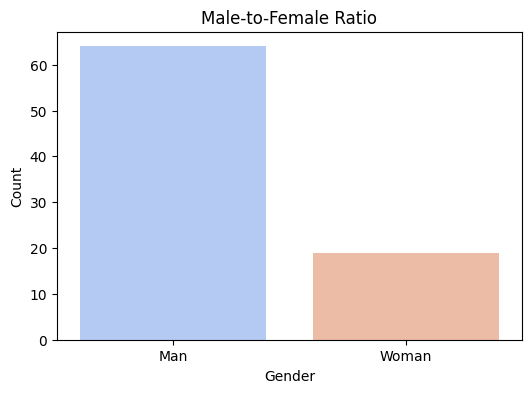

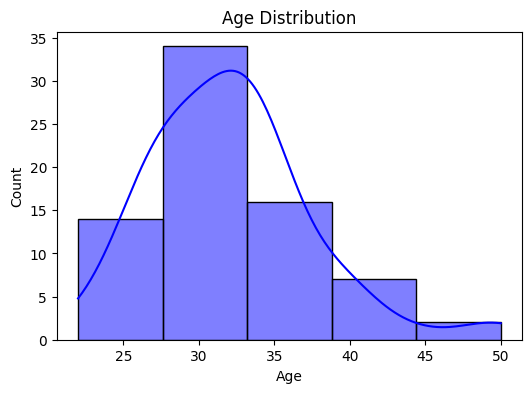

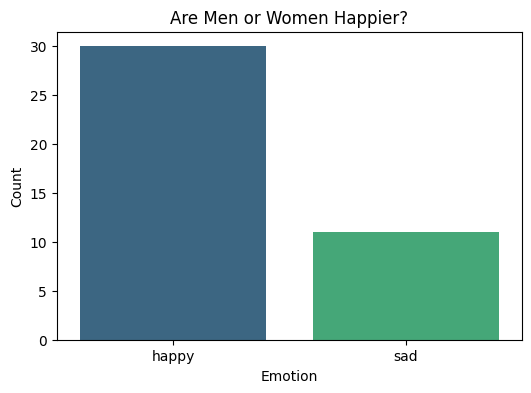

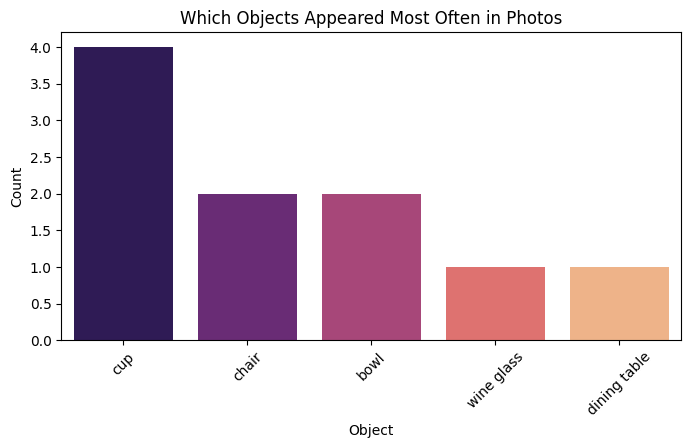

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 🔹 Data (replace with your own if needed)
gender_data = ['Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Man', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man']  # Gender (from DeepFace)
age_data = [35, 36, 27, 34, 27, 22, 31, 26, 30, 31, 27, 28, 33, 25, 31, 49, 33, 31, 28, 34, 30, 35, 39, 28, 30, 24, 26, 33, 33, 30, 28, 41, 26, 29, 29, 33, 34, 31, 33, 30, 36, 28, 37, 40, 35, 26, 40, 26, 30, 32, 33, 31, 44, 35, 39, 35, 37, 32, 33, 28, 33, 35, 34, 31, 26, 50, 27, 34, 39, 32, 34, 28, 23]  # Age (from DeepFace)
emotion_data = [('Man', 'neutral'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'happy'), ('Man', 'angry'), ('Man', 'fear'), ('Woman', 'happy'), ('Man', 'happy'), ('Woman', 'happy'), ('Woman', 'happy'), ('Woman', 'happy'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'fear'), ('Man', 'happy'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'happy'), ('Woman', 'happy'), ('Man', 'fear'), ('Woman', 'happy'), ('Man', 'sad'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'surprise'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'fear'), ('Man', 'happy'), ('Man', 'happy'), ('Man', 'neutral'), ('Man', 'neutral'), ('Man', 'happy'), ('Man', 'sad'), ('Man', 'happy'), ('Man', 'happy'), ('Man', 'neutral'), ('Woman', 'happy'), ('Man', 'happy'), ('Man', 'happy'), ('Woman', 'fear'), ('Man', 'sad'), ('Man', 'angry'), ('Man', 'neutral'), ('Man', 'neutral'), ('Man', 'happy'), ('Man', 'happy'), ('Man', 'sad'), ('Man', 'happy'), ('Woman', 'happy'), ('Man', 'happy'), ('Man', 'surprise'), ('Woman', 'fear'), ('Man', 'sad'), ('Man', 'neutral'), ('Woman', 'neutral'), ('Man', 'angry'), ('Man', 'fear'), ('Man', 'fear'), ('Man', 'sad'), ('Man', 'neutral'), ('Woman', 'neutral'), ('Man', 'angry'), ('Man', 'neutral'), ('Woman', 'fear'), ('Man', 'neutral'), ('Woman', 'sad'), ('Man', 'fear'), ('Man', 'sad'), ('Woman', 'neutral'), ('Man', 'fear'), ('Woman', 'neutral'), ('Man', 'sad'), ('Woman', 'neutral'), ('Man', 'angry'), ('Man', 'fear'), ('Man', 'fear'), ('Woman', 'sad'), ('Man', 'happy'), ('Woman', 'happy'), ('Man', 'fear'), ('Man', 'neutral'), ('Man', 'angry'), ('Man', 'neutral'), ('Woman', 'neutral'), ('Man', 'fear'), ('Woman', 'neutral'), ('Man', 'fear'), ('Man', 'sad'), ('Man', 'fear'), ('Woman', 'neutral'), ('Man', 'fear'), ('Man', 'neutral')]  # Gender + emotions
objects_data = ['cup', 'chair', 'cup', 'bowl', 'wine glass', 'chair', 'dining table', 'cup', 'bowl', 'cup']  # Objects (from YOLO)

# 🔹 1️⃣ Chart: Male-to-female ratio
plt.figure(figsize=(6, 4))
sns.countplot(x=gender_data, palette='coolwarm')
plt.title('Male-to-Female Ratio')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 🔹 2️⃣ Chart: Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(age_data, bins=5, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 🔹 3️⃣ Chart: Who is happier, men or women?
emotion_counter = Counter([e[1] for e in emotion_data if e[1] in ['happy', 'sad']])
plt.figure(figsize=(6, 4))
sns.barplot(x=list(emotion_counter.keys()), y=list(emotion_counter.values()), palette='viridis')
plt.title('Are Men or Women Happier?')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# 🔹 4️⃣ Chart: Object frequency in photos
objects_counter = Counter(objects_data)
plt.figure(figsize=(8, 4))
sns.barplot(x=list(objects_counter.keys()), y=list(objects_counter.values()), palette='magma')
plt.title('Which Objects Appeared Most Often in Photos')
plt.xlabel('Object')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
